In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

##Задание 1

In [227]:
data1 = make_blobs(n_samples=300, n_features=2, centers=5)
data2 = make_blobs(n_samples=400, n_features=2, centers=3)
data3 = make_blobs(n_samples=700, n_features=2, centers=4)

##Задание 2

1. визуализировать датасет
2. выполнить кластеризацию с помощью алгоритма KMeans
3. визуализировать центроид + цветом обозначить принадлежность точки кластеру
4. подобрать оптимальное количество кластеров по значению суммы квадратов расстояний до центроидов
5. подобрать оптимальное количество кластеров по значению коэффициента силуета
6. выполнить кластеризацию с помощью DBSCAN тремя способами (самостоятельно задать или подобрать 3 пары параметров для этого алгоритма)

Датасет 1

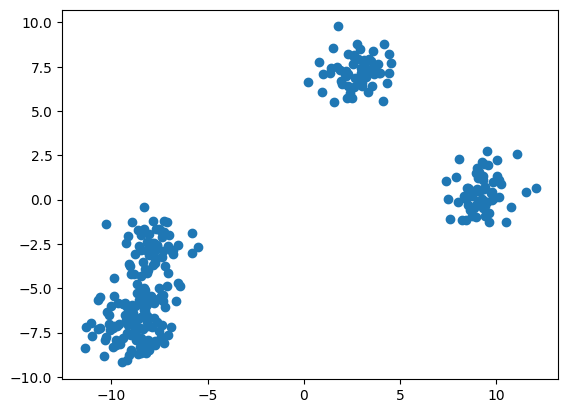

In [331]:
plt.scatter(data1[0][:,0], data1[0][:,1])

In [332]:
from sklearn.cluster import KMeans

In [333]:
kmeans_1 = KMeans(5, n_init='auto').fit(data1[0])

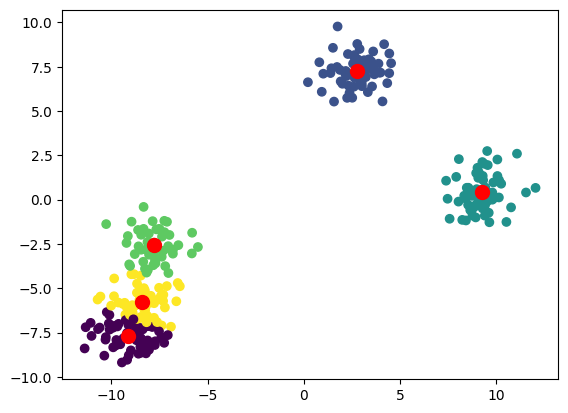

In [334]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=kmeans_1.labels_)
plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], s=100, c='red')

In [335]:
inertias1 = []

for i in range(2, 11):
  km = KMeans(i, n_init='auto').fit(data1[0])
  inertias1.append(km.inertia_)

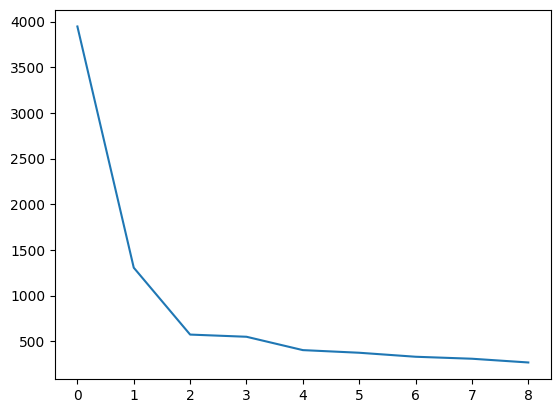

In [336]:
plt.plot(inertias1)

In [337]:
from sklearn.metrics import silhouette_score

In [338]:
silhouette_score(data1[0], kmeans_1.labels_)

0.581181719288284

In [339]:
ss1 = []

for i in range(2, 11):
  ss1.append(silhouette_score(data1[0], KMeans(i, n_init='auto').fit(data1[0]).labels_))

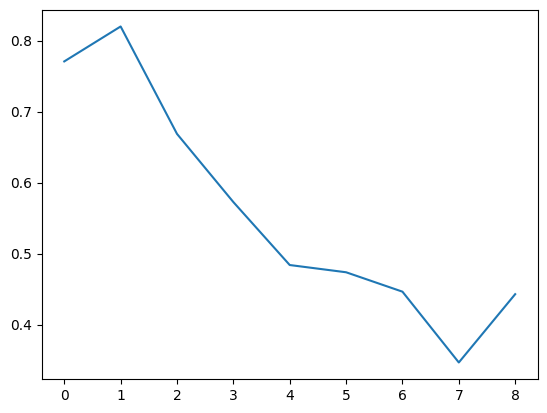

In [340]:
plt.plot(ss1)

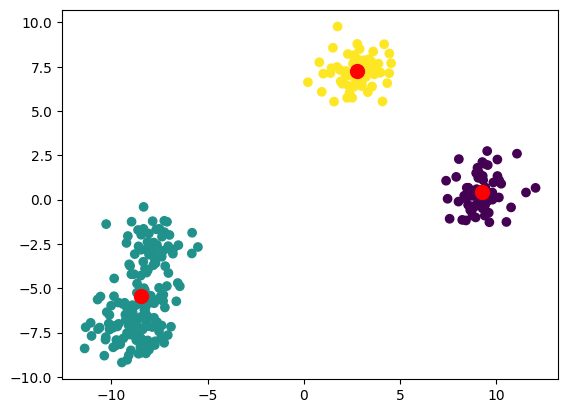

In [342]:
kmeans_12 = KMeans(3, n_init='auto').fit(data1[0])
plt.scatter(data1[0][:,0], data1[0][:,1], c=kmeans_12.labels_)
plt.scatter(kmeans_12.cluster_centers_[:,0], kmeans_12.cluster_centers_[:,1], s=100, c='red')

In [343]:
silhouette_score(data1[0], kmeans_12.labels_)

0.8199746683062228

In [240]:
from sklearn.cluster import DBSCAN

In [241]:
dbscan = DBSCAN().fit(data1[0])
print(np.unique(dbscan.labels_))

[-1  0  1  2]


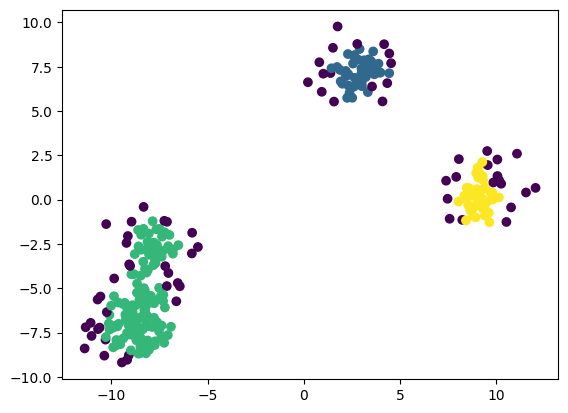

In [242]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan.labels_)

In [251]:
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(data1[0])
print(np.unique(dbscan.labels_))

[-1  0  1  2  3]


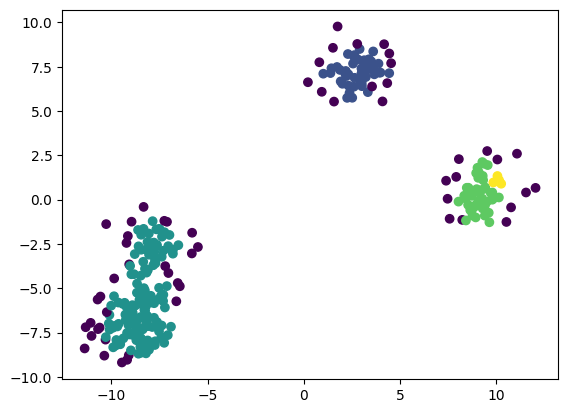

In [252]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan.labels_)

In [253]:
silhouette_score(data1[0], dbscan.labels_)

0.38488260572317146

In [245]:
from sklearn.neighbors import NearestNeighbors

In [246]:
nbrs = NearestNeighbors(n_neighbors=5).fit(data1[0])
distances, indices = nbrs.kneighbors(data1[0])

In [247]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

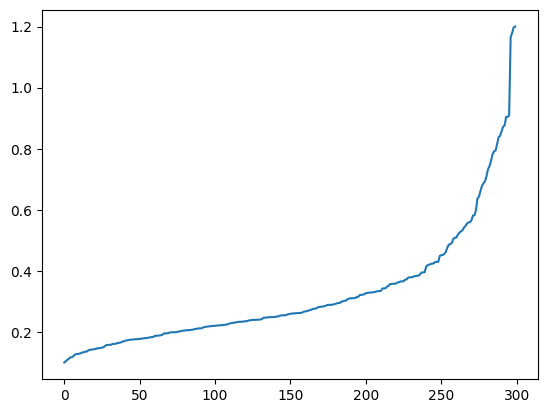

In [248]:
plt.plot(distances)

[-1  0  1  2]


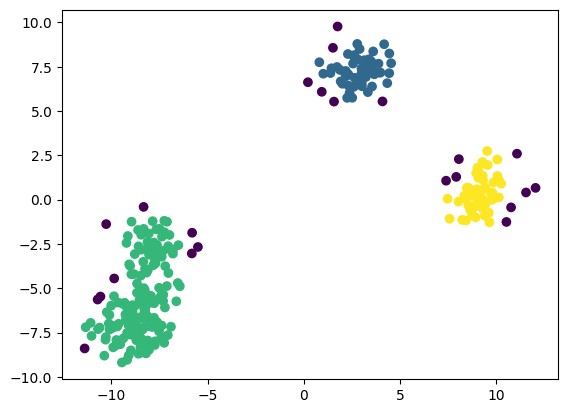

In [254]:
dbscan = DBSCAN(eps=0.7, min_samples=4).fit(data1[0])
print(np.unique(dbscan.labels_))
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan.labels_)

In [255]:
silhouette_score(data1[0], dbscan.labels_)

0.6790187516691901

[-1  0  1  2]


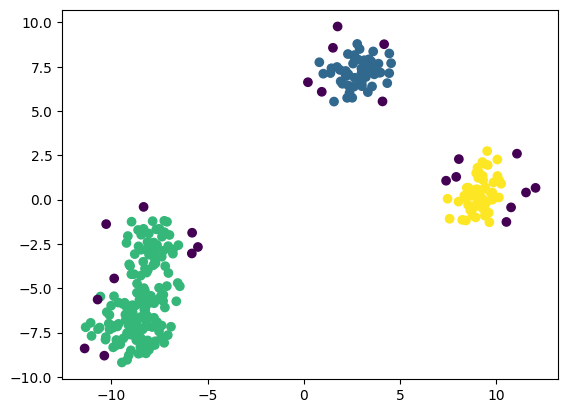

In [256]:
dbscan = DBSCAN(eps=0.9, min_samples=4, metric='manhattan').fit(data1[0])
print(np.unique(dbscan.labels_))
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan.labels_)

In [258]:
silhouette_score(data1[0], dbscan.labels_)

0.6814112679033214

Датасет 2

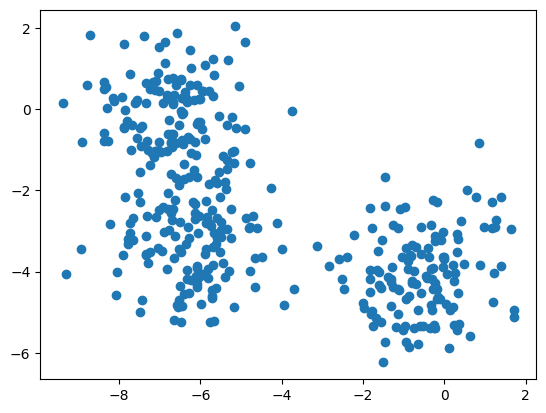

In [259]:
plt.scatter(data2[0][:,0], data2[0][:,1])

In [260]:
kmeans_2 = KMeans(3, n_init='auto').fit(data2[0])

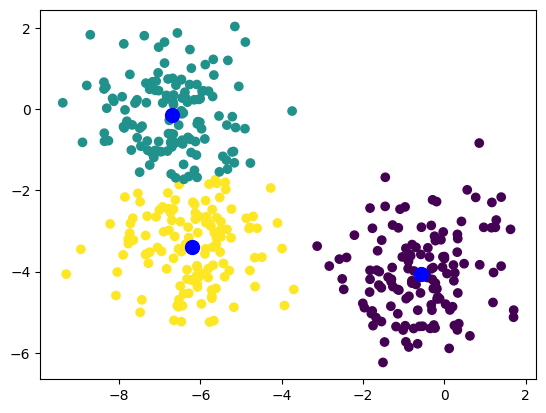

In [261]:
plt.scatter(data2[0][:,0], data2[0][:,1], c=kmeans_2.labels_)
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s=100, c='blue')

In [262]:
inertias2 = []

for i in range(2, 11):
  km = KMeans(i, n_init='auto').fit(data2[0])
  inertias2.append(km.inertia_)

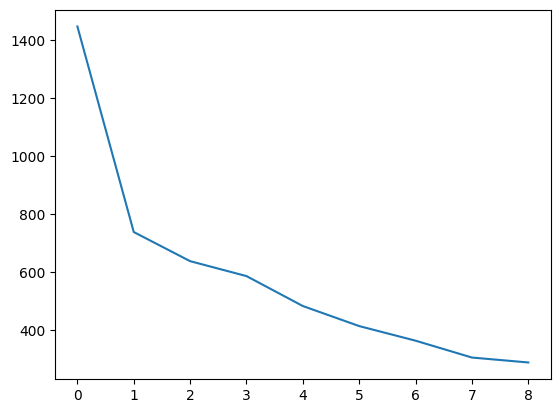

In [263]:
plt.plot(inertias2)

In [264]:
silhouette_score(data2[0], kmeans_2.labels_)

0.5671377552795178

In [265]:
ss2 = []

for i in range(2, 11):
  ss2.append(silhouette_score(data2[0], KMeans(i, n_init='auto').fit(data2[0]).labels_))

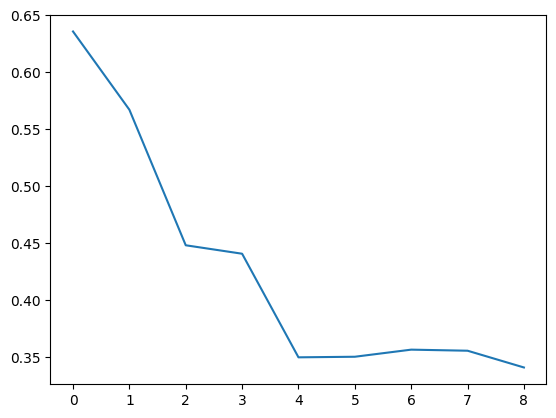

In [266]:
plt.plot(ss2)

In [267]:
dbscan = DBSCAN().fit(data2[0])
print(np.unique(dbscan.labels_))

[-1  0  1  2  3]


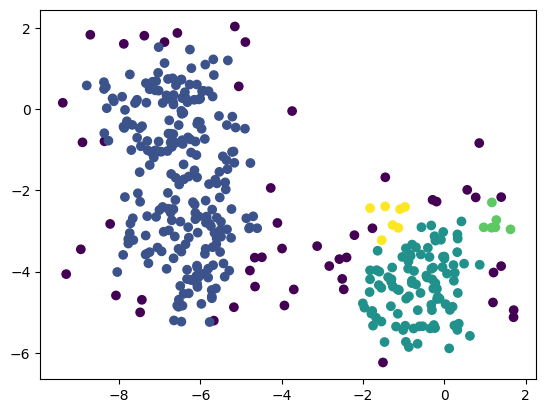

In [268]:
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan.labels_)

In [269]:
silhouette_score(data2[0], dbscan.labels_)

0.3184525907705589

[-1  0  1]


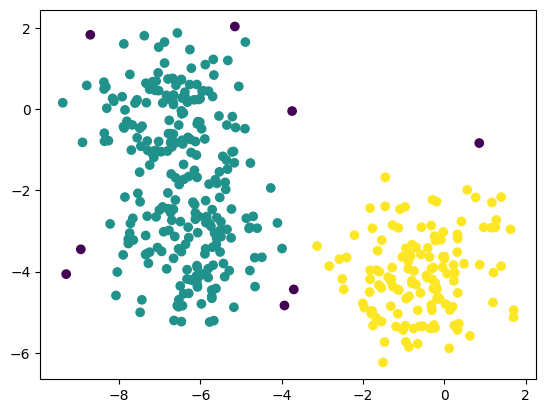

In [276]:
dbscan = DBSCAN(eps=0.8, min_samples=4).fit(data2[0])
print(np.unique(dbscan.labels_))
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan.labels_)

In [277]:
silhouette_score(data2[0], dbscan.labels_)

0.5110746871713068

In [278]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data2[0])
distances, indices = nbrs.kneighbors(data2[0])

In [279]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

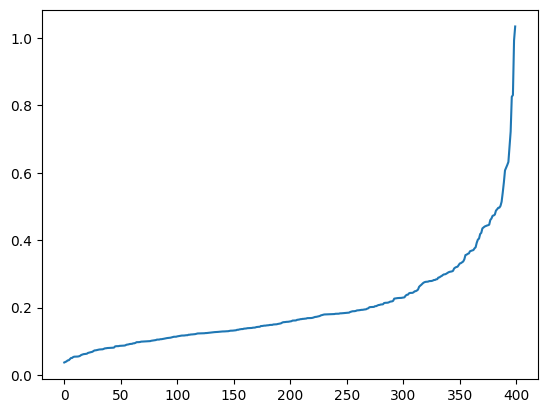

In [280]:
plt.plot(distances)

[-1  0  1]


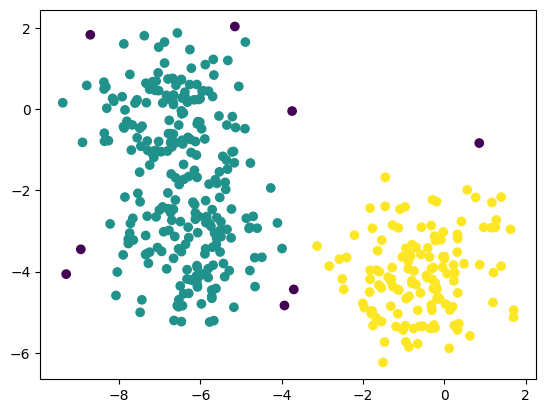

In [297]:
dbscan = DBSCAN(eps=0.8, min_samples=4).fit(data2[0])
print(np.unique(dbscan.labels_))
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan.labels_)

In [298]:
silhouette_score(data2[0], dbscan.labels_)

0.5110746871713068

[-1  0  1  2]


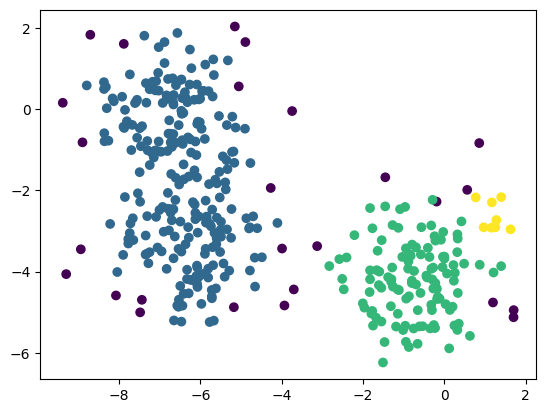

In [300]:
dbscan = DBSCAN(eps=0.7, min_samples=5, metric='manhattan').fit(data2[0])
print(np.unique(dbscan.labels_))
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan.labels_)

In [301]:
silhouette_score(data2[0], dbscan.labels_)

0.3940799933896475

Датасет 3

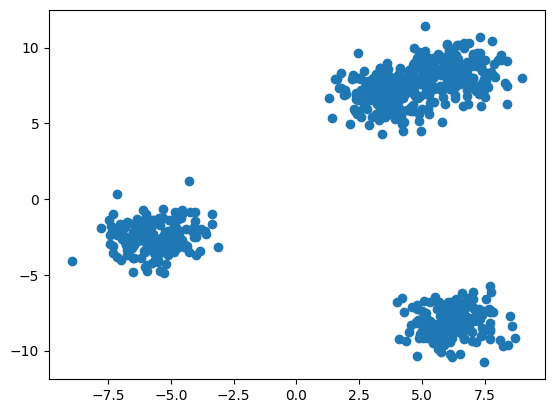

In [302]:
plt.scatter(data3[0][:,0], data3[0][:,1])

In [303]:
kmeans_3 = KMeans(4, n_init='auto').fit(data3[0])

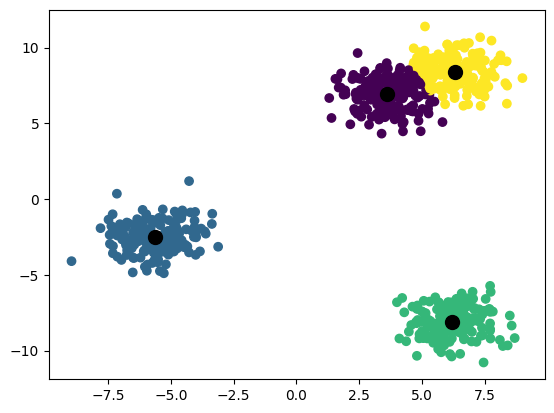

In [304]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=kmeans_3.labels_)
plt.scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], s=100, c='black')

In [305]:
inertias3 = []

for i in range(2, 11):
  km = KMeans(i, n_init='auto').fit(data3[0])
  inertias3.append(km.inertia_)

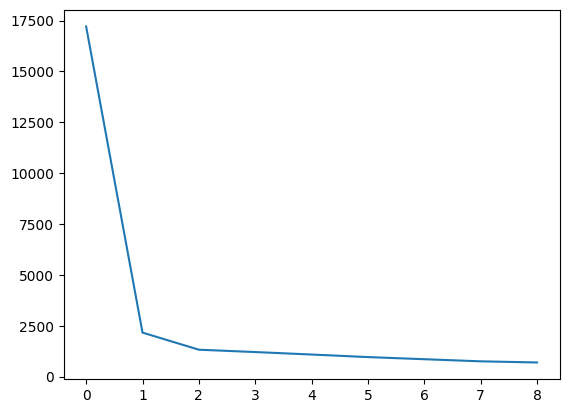

In [306]:
plt.plot(inertias3)

In [307]:
silhouette_score(data3[0], kmeans_3.labels_)

0.66894273653419

In [308]:
ss3 = []

for i in range(2, 11):
  ss3.append(silhouette_score(data3[0], KMeans(i, n_init='auto').fit(data3[0]).labels_))

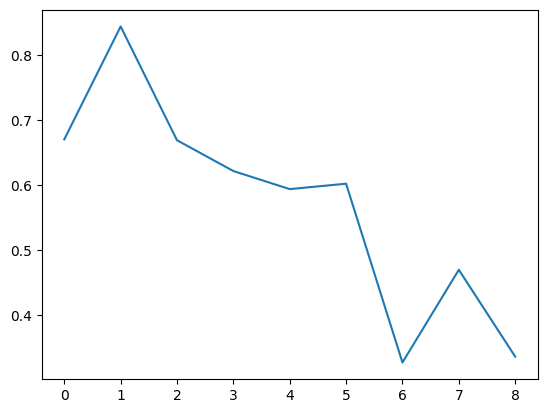

In [309]:
plt.plot(ss3)

In [310]:
dbscan = DBSCAN().fit(data3[0])
print(np.unique(dbscan.labels_))


[-1  0  1  2  3]


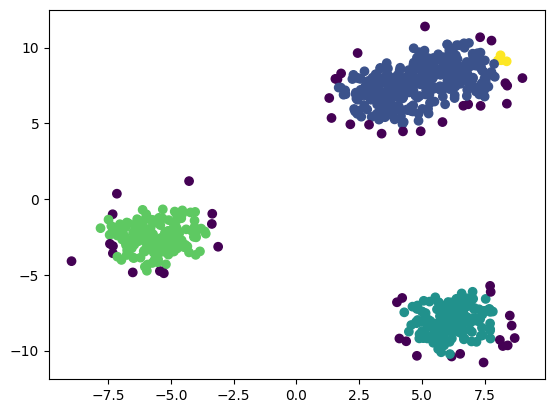

In [311]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan.labels_)

In [312]:
silhouette_score(data3[0], dbscan.labels_)

0.4621983680879463

[-1  0  1  2]


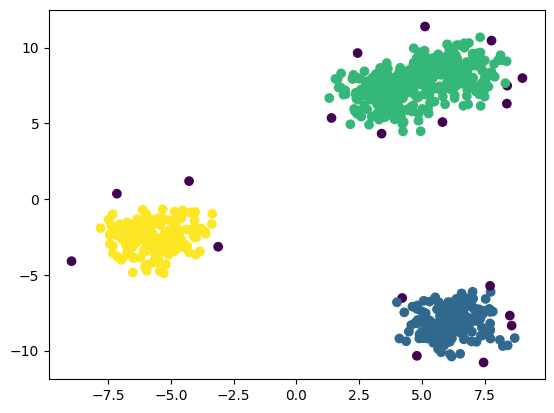

In [313]:
dbscan = DBSCAN(eps=0.7, min_samples=4).fit(data3[0])
print(np.unique(dbscan.labels_))
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan.labels_)

In [314]:
silhouette_score(data3[0], dbscan.labels_)

0.7631498125967099

In [315]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data3[0])
distances, indices = nbrs.kneighbors(data3[0])

In [316]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)

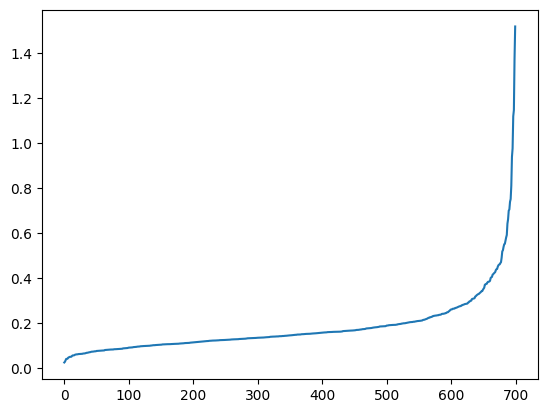

In [317]:
plt.plot(distances)

[-1  0  1  2]


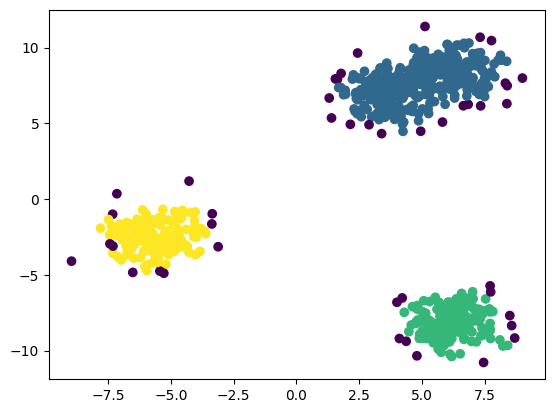

In [322]:
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(data3[0])
print(np.unique(dbscan.labels_))
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan.labels_)

In [323]:
silhouette_score(data3[0], dbscan.labels_)

0.7116005201280252

[-1  0  1  2  3]


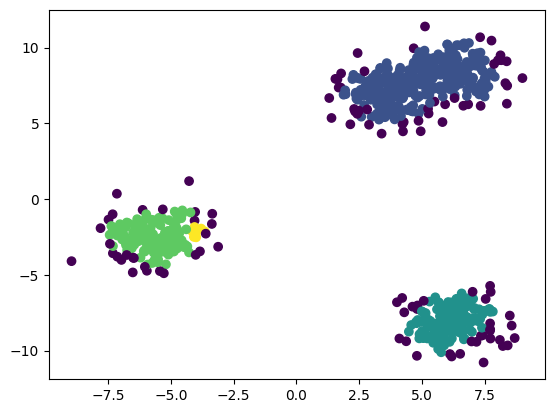

In [324]:
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='manhattan').fit(data3[0])
print(np.unique(dbscan.labels_))
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan.labels_)

In [325]:
silhouette_score(data3[0], dbscan.labels_)

0.45944552026483637

##Задание 3

In [356]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]

        self.centroids = []


    def fit_predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def inertia(self):
        dis = []
        for i, index in enumerate(self.clusters):
            sample = self.X[index].T
            print(sample)
            print(sample[0][i], sample[1][i])
            print("self.clusters", self.clusters)
            print("self.centroids", self.centroids)
            print("i ", i)
            print("index", index)
            for j in range(0, len(sample[0])):
              dis.append(euclidean_distance((sample[0][j],sample[1][j]), self.centroids[i]))
            print("dis", dis)
        print("---------------------------\n", dis)
        itog = [x ** 2 for x in dis]
        return sum(itog)

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


5


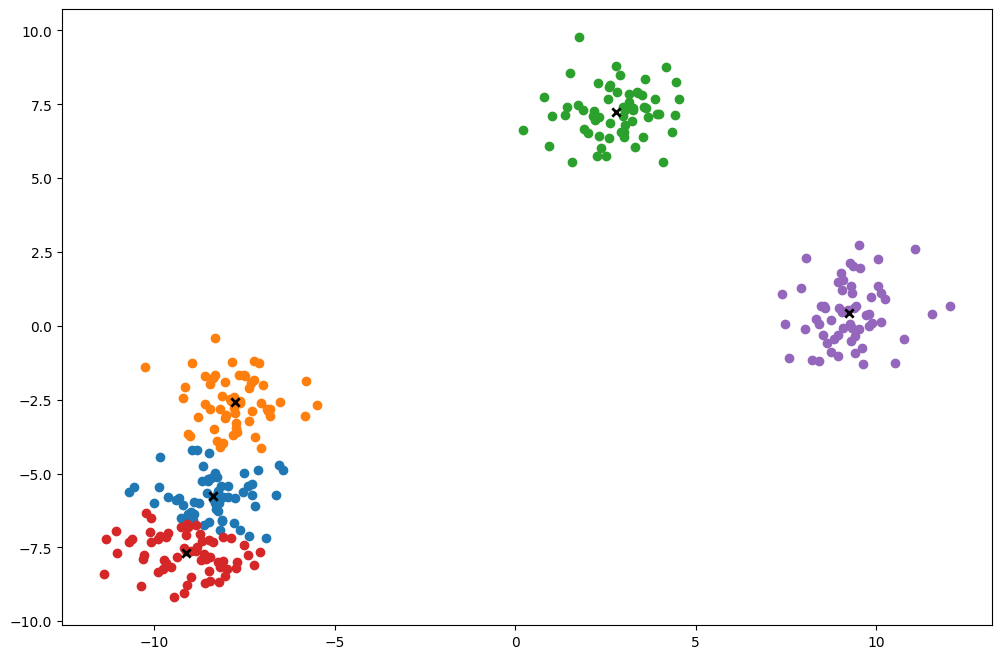

In [351]:
clusters = len(np.unique(data1[1]))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=False)
k.fit_predict(data1[0])

k.plot()

In [352]:
kmeans_1.inertia_

457.62447264728553

In [355]:
k.inertia()

[[ -6.622688    -7.78146761  -8.36391142  -7.30839802  -6.5489772
   -8.61594412  -9.26954601  -7.51842297  -7.41708275  -8.95900045
   -8.82198577  -8.47507588  -8.50736211  -7.38527053  -8.52015742
   -8.88972873  -8.67038657  -8.19650081  -6.90115651  -9.30815704
   -6.44027753  -8.43973897  -7.11630484  -7.95062449  -9.20114062
   -7.21636019  -7.55746899  -8.32868489 -10.00914958  -8.34466915
   -9.85119636  -8.2564515   -9.03082878  -8.24977279  -8.17008408
   -7.94965683  -8.20384054  -8.6633068  -10.56534013  -7.29681887
   -8.53904754  -8.9726426   -9.07882403  -8.91742554 -10.71272695
   -7.77674888  -7.6251968   -8.13564019  -8.26195102  -8.24513148
   -8.47873604  -8.30761402  -8.7598818   -8.13511091  -9.86081053
   -9.63316281  -8.90634448  -8.10388941  -8.15571892  -9.39199264
   -8.28342452]
 [ -5.73507178  -6.66758328  -5.86841013  -5.72119561  -4.70558863
   -6.75471005  -6.48744502  -4.97521257  -5.42600239  -4.20979158
   -4.20457168  -4.29192421  -5.17055258  -7.10

457.6244726472856

3


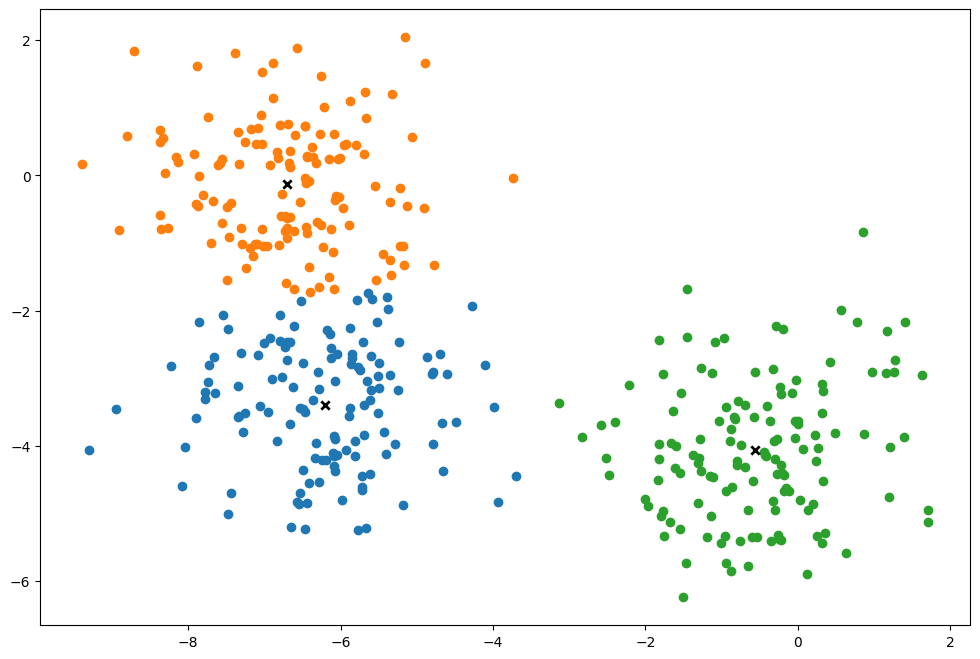

In [363]:
clusters = len(np.unique(data2[1]))
print(clusters)

k2 = KMeans(K=clusters, max_iters=150, plot_steps=False)
k2.fit_predict(data2[0])

k2.plot()

In [364]:
kmeans_2.inertia_

737.1933912164174

In [365]:
k2.inertia()

[[-6.90589238 -6.07734608 -6.57117748 -7.48461951 -5.5966654  -5.97686721
  -7.34970628 -5.37673877 -6.52316511 -7.48400278 -6.49275514 -6.66174909
  -6.46863643 -7.05612857 -5.67070205 -3.93314252 -5.78862896 -6.08239976
  -6.73420606 -5.77338564 -7.72232609 -5.93270869 -7.53925703 -7.25113254
  -5.39071777 -6.23920733 -6.12521335 -5.61864135 -7.77514716 -5.49508589
  -3.70275743 -6.93142985 -6.46893491 -6.53930063 -5.5159839  -8.22222611
  -7.77682002 -4.78413222 -5.81019752 -6.30246432 -6.09943849 -5.6020241
  -6.28866829 -6.53022397 -7.31027983 -5.71085778 -4.48797534 -5.87190761
  -5.40359575 -4.10575815 -7.90193343 -5.80942321 -4.65620676 -5.50536455
  -5.7223595  -8.94378349 -9.30392456 -6.08563092 -5.72073521 -5.49437949
  -8.04691033 -6.04402281 -5.86552523 -6.77468133 -5.6347409  -5.59424411
  -6.33078826 -5.87193132 -5.6551819  -5.6881622  -7.44142137 -5.77335456
  -3.99206029 -7.34750905 -6.63111427 -6.95546483 -7.33001927 -6.04155757
  -6.79643507 -4.27010701 -5.60870618 -

737.193391216417

4


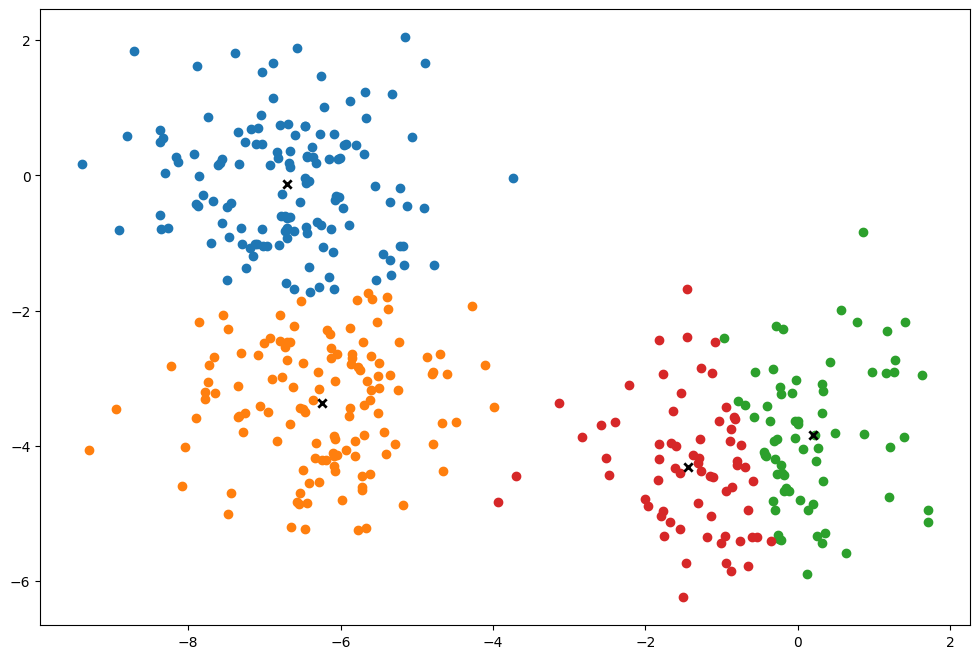

In [366]:
clusters = len(np.unique(data3[1]))
print(clusters)

k3 = KMeans(K=clusters, max_iters=150, plot_steps=False)
k3.fit_predict(data2[0])

k3.plot()

In [367]:
kmeans_3.inertia_

1322.1648188591707

In [368]:
k3.inertia()

[[-8.36180704 -7.34252743 -6.26639819 -6.30616409 -5.32523564 -5.44934968
  -6.08270808 -7.33044945 -5.18655847 -6.36040786 -6.0631103  -6.4455435
  -7.89344709 -5.21555665 -6.88409185 -7.02872624 -6.79794109 -5.69996781
  -5.6694595  -5.33487059 -6.88357013 -5.1535496  -6.82628839 -8.3664457
  -8.71009033 -6.71055997 -7.43614289 -6.56748187 -5.05713268 -6.81239387
  -6.14745457 -5.35842984 -6.67532879 -8.16228064 -7.5602856  -5.54396106
  -6.08754629 -6.7327716  -8.37243185 -8.32629584 -7.46545867 -8.90250437
  -6.72009061 -5.13460556 -6.23062349 -5.80006952 -6.01514141 -6.76808902
  -8.37511711 -7.55781884 -8.79768251 -6.66356673 -6.60315344 -5.22327606
  -7.29753108 -6.70601759 -4.90457429 -4.77054641 -8.13171618 -6.00681066
  -7.02790786 -6.47308469 -5.16570746 -7.10844321 -7.61024538 -7.17697537
  -6.96361547 -6.04079729 -7.04115587 -6.46849989 -7.49358914 -8.30561469
  -6.68442614 -6.43740684 -5.68390132 -6.65992914 -6.60975012 -7.12160007
  -7.19098578 -5.97162644 -7.09030741 -7

644.1579602943679